<a href="https://colab.research.google.com/github/jmhuer/quantum_dots/blob/main/plot_gpr_noisy_targets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline


# Gaussian Processes regression: basic introductory example

A simple one-dimensional regression example computed in two different ways:

1. A noise-free case
2. A noisy case with known noise-level per datapoint

In both cases, the kernel's parameters are estimated using the maximum
likelihood principle.

The figures illustrate the interpolating property of the Gaussian Process
model as well as its probabilistic nature in the form of a pointwise 95%
confidence interval.

Note that the parameter ``alpha`` is applied as a Tikhonov
regularization of the assumed covariance between the training points.


Automatically created module for IPython interactive environment


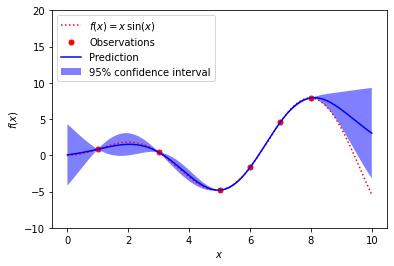

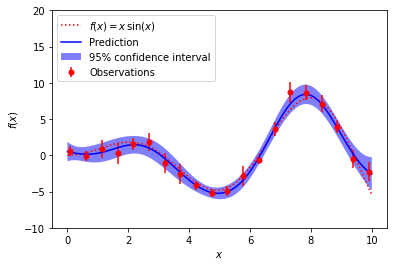

In [2]:
print(__doc__)

# Author: Vincent Dubourg <vincent.dubourg@gmail.com>
#         Jake Vanderplas <vanderplas@astro.washington.edu>
#         Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>s
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

np.random.seed(1)


def f(x):
    """The function to predict."""
    return x * np.sin(x)

# ----------------------------------------------------------------------
#  First the noiseless case
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T

# Observations
y = f(X).ravel()

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

# ----------------------------------------------------------------------
# now the noisy case
X = np.linspace(0.1, 9.9, 20)
X = np.atleast_2d(X).T

# Observations and noise
y = f(X).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

# Instantiate a Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, alpha=dy ** 2,
                              n_restarts_optimizer=10)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

plt.show()

In [5]:
Alphabet = ['#AA0DFE', '#3283FE', '#85660D', '#782AB6', '#565656']
# imports
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import numpy as np

# sample data in a pandas dataframe
np.random.seed(1)
df=pd.DataFrame(dict(A=np.random.uniform(low=-1, high=2, size=25).tolist(),
                    B=np.random.uniform(low=-4, high=3, size=25).tolist(),
                    C=np.random.uniform(low=-1, high=3, size=25).tolist(),
                    ))
df = df.cumsum()

# define colors as a list 
colors = px.colors.qualitative.Plotly

# convert plotly hex colors to rgba to enable transparency adjustments
def hex_rgba(hex, transparency):
    col_hex = hex.lstrip('#')
    col_rgb = list(int(col_hex[i:i+2], 16) for i in (0, 2, 4))
    col_rgb.extend([transparency])
    areacol = tuple(col_rgb)
    return areacol

rgba = [hex_rgba(c, transparency=0.2) for c in colors]
colCycle = ['rgba'+str(elem) for elem in rgba]

# Make sure the colors run in cycles if there are more lines than colors
def next_col(cols):
    while True:
        for col in cols:
            yield col
line_color=next_col(cols=colCycle)

# plotly  figure
fig = go.Figure()

# add line and shaded area for each series and standards deviation
for i, col in enumerate(df):
    new_col = next(line_color)
    x = list(df.index.values+1)
    y1 = df[col]
    y1_upper = [(y + np.std(df[col])) for y in df[col]]
    y1_lower = [(y - np.std(df[col])) for y in df[col]]
    y1_lower = y1_lower[::-1]

    # standard deviation area
    fig.add_traces(go.Scatter(x=x+x[::-1],
                                y=y1_upper+y1_lower,
                                fill='tozerox',
                                fillcolor=new_col,
                                line=dict(color='rgba(255,255,255,0)'),
                                showlegend=False,
                                name=col))

    # line trace
    fig.add_traces(go.Scatter(x=x,
                              y=y1,
                              line=dict(color=new_col, width=2.5),
                              mode='lines',
                              name=col)
                                )
# set x-axis
fig.update_layout(xaxis=dict(range=[1,len(df)]))

fig.show()